### ШАГ 1 - открыли таблицу, изучили данные

### ШАГ 2

#### 1) Пропущенные значения помимо столбца days_employed есть в столбце total_income

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('data.csv')

def printHead(columns, num):
    print(df[columns].head(num))
    print()

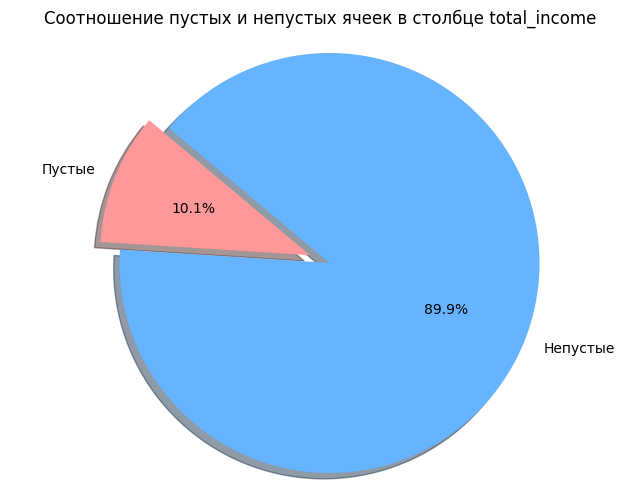

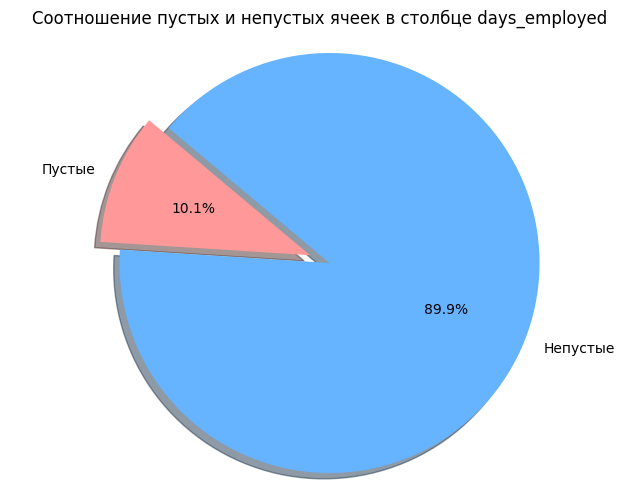

In [2]:
def plotEmptyNotempty(columnName):
    empty = df[columnName].isnull().sum()
    nepmpty = df[columnName].count()
    cnt = empty + nepmpty
    percentEmpty = (empty / cnt) * 100
    percentNempty = 100 - percentEmpty

    labels = ['Пустые', 'Непустые']
    sizes = [percentEmpty, percentNempty]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0) 

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(f'Соотношение пустых и непустых ячеек в столбце {columnName}')
    plt.show()

plotEmptyNotempty('total_income')
plotEmptyNotempty('days_employed')

Пустые ячейки в таблице могут появляться по разным причинам. Например, потеря пакетов данных при передаче / отсутствие данных в прицнипе / ошибка на стороне клиента / сервера / баг в API. Данные в столбце total_income зависят от данных в столбце days_employed => соотношение пустых и непустых ячеек одинаковое для обоих столбцов.

In [3]:
printHead('total_income', 13)

def putMedianToEmptyCell(columnName):
    medianValue = df[columnName].median()
    df.loc[df[columnName].isnull(), columnName] = medianValue

putMedianToEmptyCell('total_income')
printHead('total_income', 13)

0     253875.639453
1     112080.014102
2     145885.952297
3     267628.550329
4     158616.077870
5     255763.565419
6     240525.971920
7     135823.934197
8      95856.832424
9     144425.938277
10    113943.491460
11     77069.234271
12              NaN
Name: total_income, dtype: float64

0     253875.639453
1     112080.014102
2     145885.952297
3     267628.550329
4     158616.077870
5     255763.565419
6     240525.971920
7     135823.934197
8      95856.832424
9     144425.938277
10    113943.491460
11     77069.234271
12    145017.937533
Name: total_income, dtype: float64



Заполнение медианным значением хорошо по нескольким причинам: 
1) Медиана менее чувствительна к выбросам по сравнению со средним значением. Это означает, что если в данных есть аномально высокие или низкие значения, они не будут искажать медиану так сильно, как это произошло бы со средним.
2) Метод заполнения медианой легко реализовать с помощью стандартных библиотек, таких как Pandas.
3) Заполнение пропусков медианой помогает сохранить распределение данных. Это особенно важно для статистического анализа и моделей машинного обучения, где форма распределения может влиять на результаты. Использование медианы помогает избежать искажения распределения, которое может произойти при использовании среднего значения.

#### 2) Как было описано ранее, передача данных - процесс не всегда защищенный от всякого рода потерь. Возможные причины искажения или потери данных - ошибка в работе API, помехи на пути передачи данных, атака злоумышленника, проблемы с оборудованием, ошибка в работе алгоритмов.

In [4]:
printHead('days_employed', 13)
def putNanToLessThanZeroCell(columnName):
    df.loc[df[columnName] < 0, columnName] = np.nan

putNanToLessThanZeroCell('days_employed')
printHead('days_employed', 13)
putMedianToEmptyCell('days_employed')
printHead('days_employed', 13)

0      -8437.673028
1      -4024.803754
2      -5623.422610
3      -4124.747207
4     340266.072047
5       -926.185831
6      -2879.202052
7       -152.779569
8      -6929.865299
9      -2188.756445
10     -4171.483647
11      -792.701887
12              NaN
Name: days_employed, dtype: float64

0               NaN
1               NaN
2               NaN
3               NaN
4     340266.072047
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
Name: days_employed, dtype: float64

0     365213.306266
1     365213.306266
2     365213.306266
3     365213.306266
4     340266.072047
5     365213.306266
6     365213.306266
7     365213.306266
8     365213.306266
9     365213.306266
10    365213.306266
11    365213.306266
12    365213.306266
Name: days_employed, dtype: float64



#### 3.

In [5]:
printHead('total_income', 5)
def doubleToInt(columnName):
    df[columnName] = df[columnName].astype('int64')

doubleToInt('total_income')
printHead('total_income', 5)

0    253875.639453
1    112080.014102
2    145885.952297
3    267628.550329
4    158616.077870
Name: total_income, dtype: float64

0    253875
1    112080
2    145885
3    267628
4    158616
Name: total_income, dtype: int64



#### 4. Чтобы удалить дубликаты, включая неявные, сначала приведем все строковые данные к нижнему регистру. Затем воспользуемся методом drop_diplicates(). Далее сбросим индексы. Метод duplicated() считает количество одинаковых строк в таблице.

Возможные причины появления дубликатов: ошибка в процессе заполнения данных о работниках, ошибка в работе алгоритма в базе данных, злоумышленная атака

In [6]:
print(df.duplicated().sum())
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print(df.duplicated().sum())

54
0


#### 5.

In [7]:
edudf = df[['education', 'education_id']].drop_duplicates()
edudf.reset_index(drop=True, inplace=True)

familydf = df[['family_status', 'family_status_id']].drop_duplicates()
familydf.reset_index(drop=True, inplace=True)

print(edudf)
print()
print(familydf)

             education  education_id
0               высшее             0
1              среднее             1
2  неоконченное высшее             2
3            начальное             3
4       ученая степень             4

           family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  не женат / не замужем                 4


In [8]:
df.drop(columns=['education'], inplace=True)
df.drop(columns=['family_status'], inplace=True)

#### 6.

In [9]:
bins = [0, 30000, 50000, 200000, 1000000, float('inf')]
labels = ['E', 'D', 'C', 'B', 'A']
df['total_income_category'] = pd.cut(df['total_income'], bins=bins, labels=labels, right=True)
printHead(['total_income', 'total_income_category'], 10)

   total_income total_income_category
0        253875                     B
1        112080                     C
2        145885                     C
3        267628                     B
4        158616                     C
5        255763                     B
6        240525                     B
7        135823                     C
8         95856                     C
9        144425                     C



#### 7.

In [10]:
# purpose = df['purpose'].drop_duplicates()
# print(purpose)
def makePurposeCategory():
    def categorize(text):
        if 'автомоб' in text:
            return 'операции с автомобилем'
        elif 'недвижим' in text or 'жиль' in text:
            return 'операции с недвижимостью'
        elif 'свадьб' in text:
            return 'проведение свадьбы'
        elif 'образовани' in text:

            return 'получение образования'
        else:
            return 'другая категория'
    df['purpose_category'] = df['purpose'].apply(categorize)

makePurposeCategory()
printHead(['purpose', 'purpose_category'], 30)

                                   purpose          purpose_category
0                            покупка жилья  операции с недвижимостью
1                  приобретение автомобиля    операции с автомобилем
2                            покупка жилья  операции с недвижимостью
3               дополнительное образование     получение образования
4                          сыграть свадьбу        проведение свадьбы
5                            покупка жилья  операции с недвижимостью
6                        операции с жильем  операции с недвижимостью
7                              образование     получение образования
8                    на проведение свадьбы        проведение свадьбы
9                  покупка жилья для семьи  операции с недвижимостью
10                    покупка недвижимости  операции с недвижимостью
11       покупка коммерческой недвижимости  операции с недвижимостью
12                         сыграть свадьбу        проведение свадьбы
13                 приобретение ав

### ШАГ 3


In [11]:
print(df.head(3))

   children  days_employed  dob_years  education_id  family_status_id gender  \
0         1  365213.306266         42             0                 0      f   
1         1  365213.306266         36             1                 0      f   
2         0  365213.306266         33             1                 0      m   

  income_type  debt  total_income                  purpose  \
0   сотрудник     0        253875            покупка жилья   
1   сотрудник     0        112080  приобретение автомобиля   
2   сотрудник     0        145885            покупка жилья   

  total_income_category          purpose_category  
0                     B  операции с недвижимостью  
1                     C    операции с автомобилем  
2                     C  операции с недвижимостью  


In [12]:
def printPlot(plotName, xCol, yCol):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=xCol, y=yCol, data=df)
    plt.title(plotName)
    plt.xlabel(xCol)
    plt.ylabel(yCol)
    plt.grid(True)

    plt.xlim(-0.5, df[xCol].max() + 1)  
    # plt.ylim(df[yCol].min(), df[yCol].max() + 500000) 
    # plt.xticks(range(int(0), int(df[xCol].max()) + 2))
    
    plt.show()

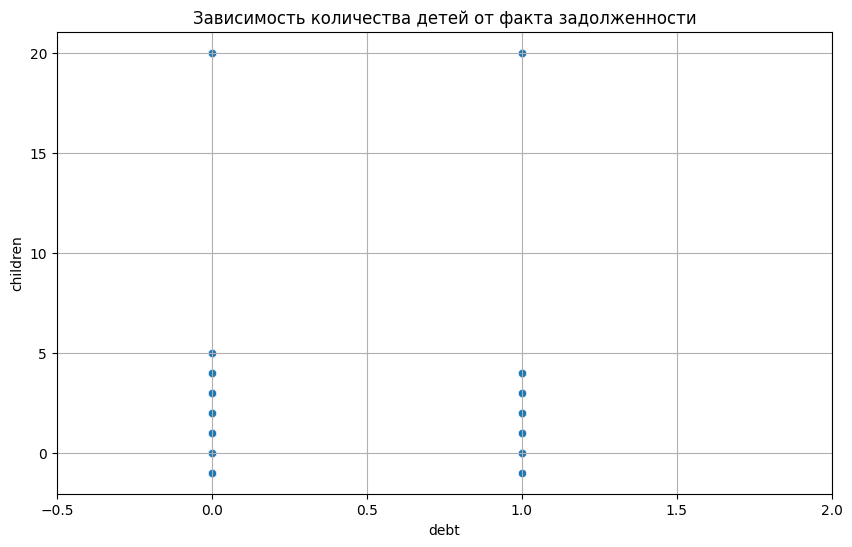

In [13]:
printPlot('Зависимость количества детей от факта задолженности', 'debt', 'children')

Есть ли зависимость между количеством детей и возвратом кредита в срок? Поле debt слишком малоинформативное для того, чтобы сделать обоснованный вывод по этому поводу. Но исходя из наших данных - распределение примерно поровну => зависимости нет.

                       No Debt (0)  Debt (1)
family_status_id                            
женат / замужем              11408       931
гражданский брак              3763       388
вдовец / вдова                 896        63
в разводе                     1110        85
не женат / не замужем         2536       274


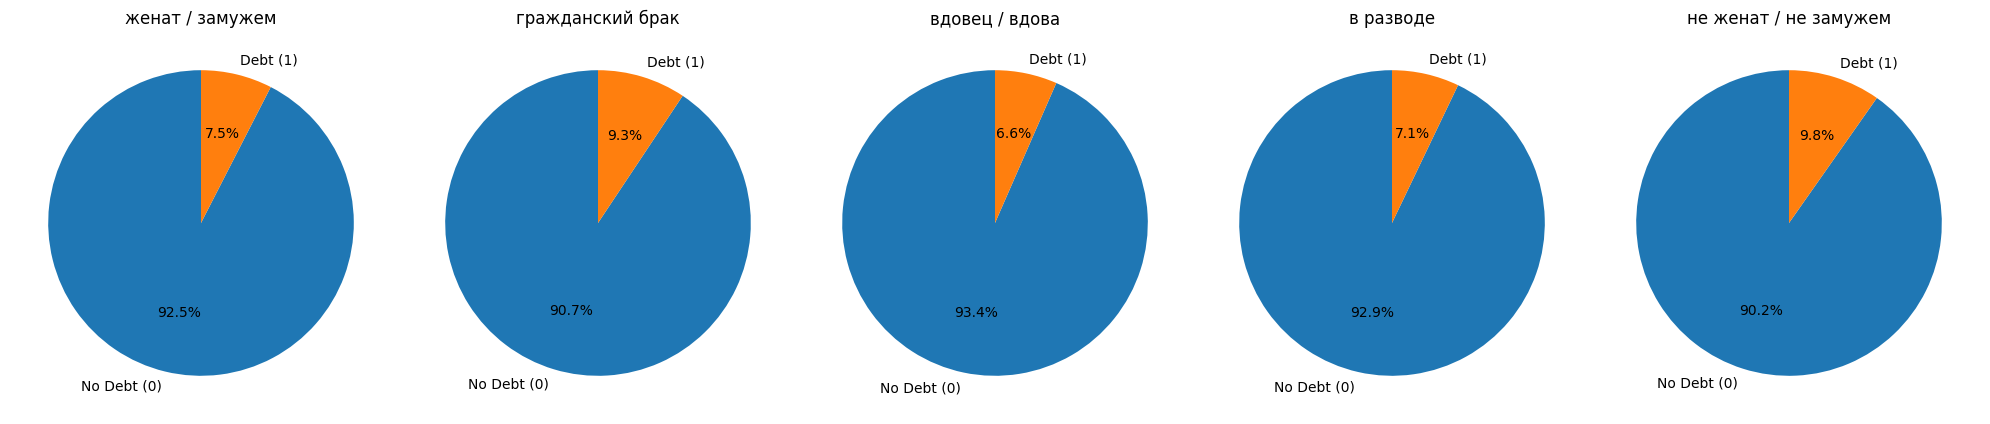

In [14]:
result = df.pivot_table(index='family_status_id', columns='debt', aggfunc='size', fill_value=0)
result.index = result.index.map(familydf.set_index('family_status_id')['family_status'])
result.columns = ['No Debt (0)', 'Debt (1)']

print(result)

fig, axes = plt.subplots(1, len(result), figsize=(20, 5))

for ax, (status, row) in zip(axes, result.iterrows()):
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(status)

plt.tight_layout()
plt.show()

Есть ли зависимость между семейным положением и возвратом кредита в срок? - У всех семейных статусов процент факта невозврата долга в срок примерно одинаковый и находится в диапазоне от 6.6 до 9.8 => зависимости нет


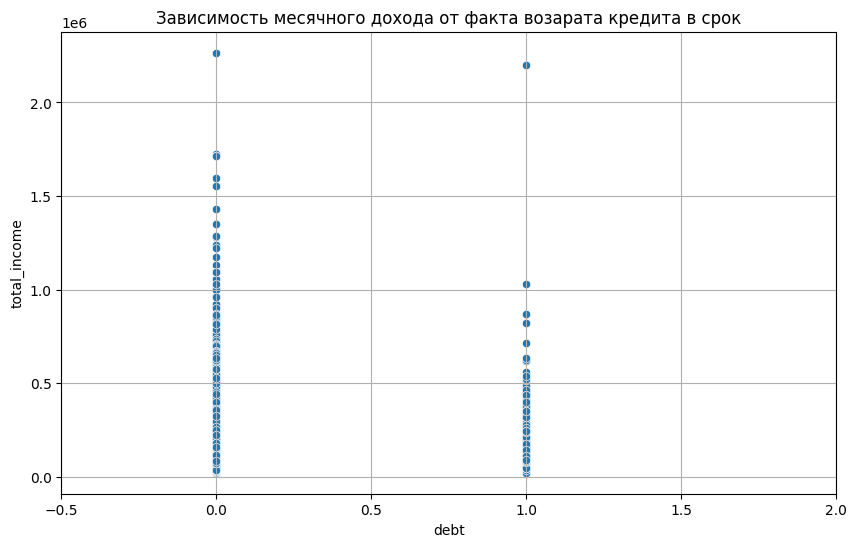

In [15]:
printPlot("Зависимость месячного дохода от факта возарата кредита в срок", 'debt', 'total_income')

Есть ли зависимость между уровнем дохода и возвратом кредита в срок? - На графика видно, что уровень дохода обратно пропорционален факту возврата кредита в срок => зависимость есть

                          No Debt (0)  Debt (1)
purpose_category                               
операции с автомобилем           3903       403
операции с недвижимостью        10029       782
получение образования            3643       370
проведение свадьбы               2138       186


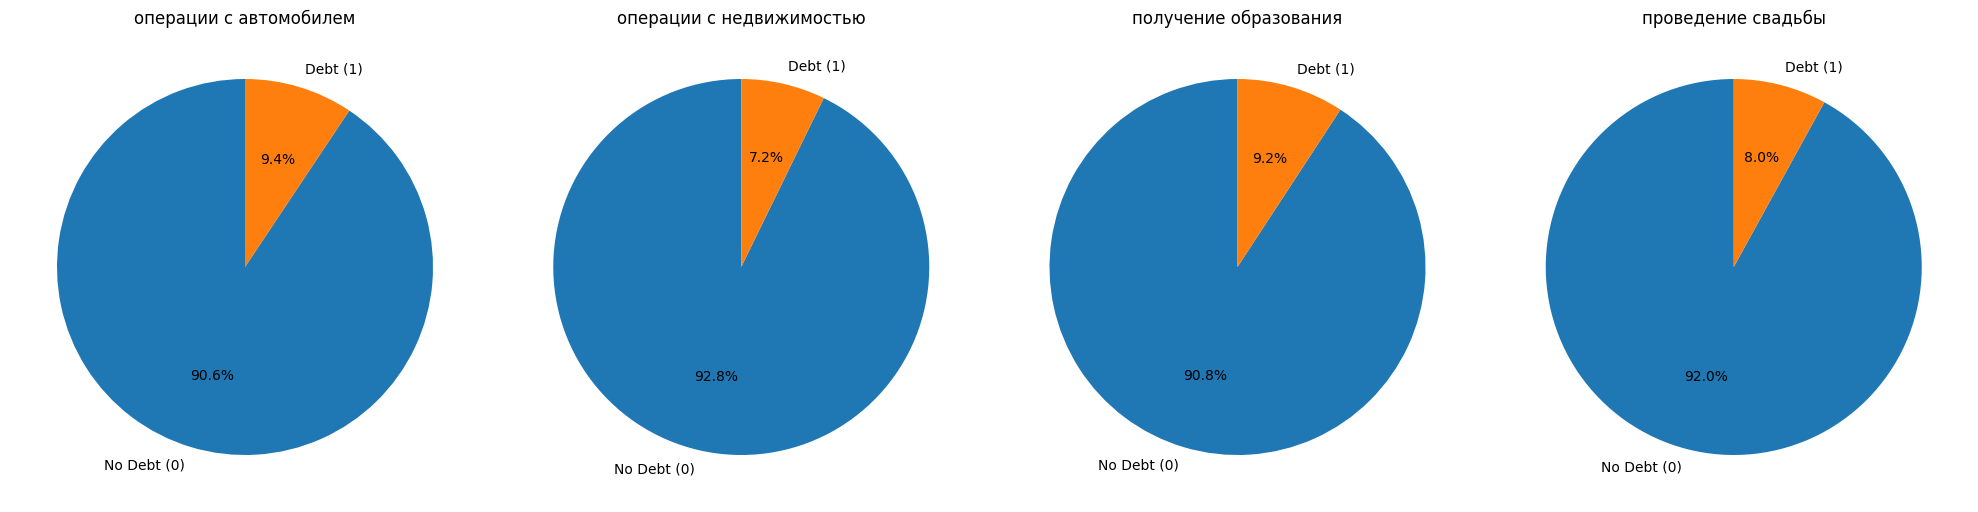

In [16]:
result = df.pivot_table(index='purpose_category', columns='debt', aggfunc='size', fill_value=0)
result.columns = ['No Debt (0)', 'Debt (1)']

print(result)

fig, axes = plt.subplots(1, len(result), figsize=(20, 5))

for ax, (status, row) in zip(axes, result.iterrows()):
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(status)

plt.tight_layout()
plt.show()

Как разные цели кредита влияют на его возврат в срок? - Процент невозврата кредита в срок примерно одинаковый для всех целей => почти никак не влияют.

### ШАГ 4
В ходе выполнения лабораторной работы была проведена комплексная работа по анализу данных о платёжеспособности клиентов банка. Основные этапы работы включали:
Изучение данных - Были проанализированы данные, содержащие информацию о клиентах, включая количество детей, трудовой стаж, возраст, уровень образования, семейное положение, пол, тип занятости, задолженность и ежемесячный доход.

Обработка пропущенных значений - Были выявлены пропуски в столбцах days_employed и total_income. Пропуски были заполнены медианными значениями, что является оптимальным решением для количественных переменных, так как медиана менее чувствительна к выбросам.
Обработка аномалий - Обнаруженные отрицательные значения в столбце days_employed были исправлены.

Замена типа данных - В столбце total_income вещественный тип данных был заменён на целочисленный для удобства анализа.

Удаление дубликатов - Были выявлены и удалены дубликаты в данных.

На основании заданных диапазонов был создан новый столбец total_income_category, который классифицирует клиентов по уровням дохода.
Также была разработана функция для категоризации целей кредита в новый столбец purpose_category.

Анализ зависимостей - Проведен анализ зависимостей между количеством детей, семейным положением, уровнем дохода и возвратом кредита в срок. Результаты показали наличие определённых зависимостей, что может помочь в построении модели кредитного скоринга.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Загрузка данных
df = pd.read_csv('data.csv')

# Предобработка данных
df['total_income'].fillna(df['total_income'].median(), inplace=True)
df['days_employed'].fillna(df['days_employed'].median(), inplace=True)
df['days_employed'] = df['days_employed'].abs()

# Создание категорий для total_income
bins = [0, 30000, 50000, 200000, 1000000, float('inf')]
labels = ['E', 'D', 'C', 'B', 'A']
df['total_income_category'] = pd.cut(df['total_income'], bins=bins, labels=labels)

# Создание категорий для цели кредита
def categorize_purpose(purpose):
    if 'автомоб' in purpose:
        return 'операции с автомобилем'
    elif 'недвижим' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образовани' in purpose:
        return 'получение образования'
    else:
        return 'другая категория'

df['purpose_category'] = df['purpose'].apply(categorize_purpose)

# Удаление ненужных столбцов
df.drop(columns=['education', 'family_status', 'purpose'], inplace=True)

# Преобразование категориальных данных в числовой формат
categorical_cols = ['gender', 'income_type', 'total_income_category', 'purpose_category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['debt'])
y = df['debt']

# Нормализация числовых данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Логистическая регрессия с классом 'balanced'
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Метрики логистической регрессии
print("Логистическая регрессия (с балансировкой):")
print(f"Точность: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))

# Случайный лес с балансировкой классов
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Метрики случайного леса
print("\nСлучайный лес (с балансировкой):")
print(f"Точность: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))


/var/folders/qt/8vqlby8x3g5fyt54hbqv10cc0000gn/T/ipykernel_40528/945937058.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_income'].fillna(df['total_income'].median(), inplace=True)
/var/folders/qt/8vqlby8x3g5fyt54hbqv10cc0000gn/T/ipykernel_40528/945937058.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

Логистическая регрессия (с балансировкой):
Точность: 0.59
ROC AUC: 0.58
              precision    recall  f1-score   support

           0       0.94      0.59      0.73      5933
           1       0.11      0.58      0.19       525

    accuracy                           0.59      6458
   macro avg       0.53      0.58      0.46      6458
weighted avg       0.87      0.59      0.68      6458


Случайный лес (с балансировкой):
Точность: 0.91
ROC AUC: 0.50
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5933
           1       0.06      0.00      0.01       525

    accuracy                           0.91      6458
   macro avg       0.49      0.50      0.48      6458
weighted avg       0.85      0.91      0.88      6458

